In [1]:
import numpy as np
import matplotlib.pyplot as plt
import CoolProp.CoolProp as CP
import CoolProp.Plots as CPP

In [2]:
#approximating mdot
GPH2Kgs = .00078 #gallons per hour (steam evaporated) to kg/s
mdot_sap_high = 12*GPH2Kgs


Tsapi = 278 # [K] about 40F
Pa = 101.3 * 10**3 # average ambient pressure [Pa]
mdot_sap_low = .001 #[kg/s]
#Qdot_fire = 20000 #[20 kW from stove]


In [3]:

#calculating the Qdot we need 
hsap = CP.PropsSI('H','P',Pa,'T', Tsapi,'water') #[j/kg]
hsteam = CP.PropsSI('H','P',Pa,'Q', 1 ,'water') #[j/kg]
Qdot_need = mdot_sap_high* (hsteam-hsap)

print(Qdot_need)


24851.073858365093


In [4]:
def simpleEvap(mdot_sap, Tsapi):
    hsap = CP.PropsSI('H','P',Pa,'T', Tsapi,'water') #[j/kg]
    hsteam = CP.PropsSI('H','P',Pa,'Q', 1 ,'water') #[j/kg]
    Qdot_need = mdot_sap*(hsteam - hsap)
    return Qdot_need




In [9]:
n=50 
mdots = np.linspace(mdot_sap_low, mdot_sap_high, n)
results = []
for j in range(0, n):
    if j == 0:
        results = [simpleEvap(mdots[j], Tsapi)]
    else:
        results.append(simpleEvap(mdots[j], Tsapi))




Text(0.5, 1.0, 'Heat Input in Relation to Mass Flow')

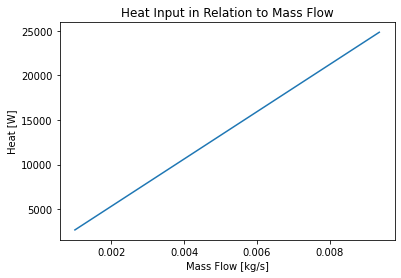

In [10]:
plt.plot(mdots, results)
plt.xlabel('Mass Flow [kg/s]')
plt.ylabel('Heat [W]')
plt.title('Heat Input in Relation to Mass Flow')




In [25]:
n=50 
mdots = np.linspace(mdot_sap_low, mdot_sap_high, n)
Tsapis = np.linspace(280, 360, n)
mdots_,Tsapis_ = np.meshgrid(mdots, Tsapis)
resul2 
# for j in range(0, n):
#     for i in range(0, n):
#         if i ==0:
#             newrow = [simpleEvap(mdots[j], Tsapis[i])]
#         else: 
#             newrow.append(simpleEvap(mdots[j], Tsapis[i]))
# #         results = np.vstack([results, newrow])
#     result2.append(newrow)

array([[ 2646.62303513,  3098.16933256,  3549.71562998, ...,
        23869.29901402, 24320.84531144, 24772.39160886],
       [ 2639.7669994 ,  3090.14357317,  3540.52014695, ...,
        23807.46596682, 24257.84254059, 24708.21911437],
       [ 2632.91582867,  3082.12350883,  3531.33118899, ...,
        23745.67679607, 24194.88447623, 24644.09215639],
       ...,
       [ 2325.41412129,  2722.15824484,  3118.90236839, ...,
        20972.38792814, 21369.13205169, 21765.87617524],
       [ 2318.55658055,  2714.13072368,  3109.70486681, ...,
        20910.54130765, 21306.11545078, 21701.68959391],
       [ 2311.69677852,  2706.10055542,  3100.50433233, ...,
        20848.6742931 , 21243.07807   , 21637.48184691]])

In [12]:
# len(results)
# print(results[2])

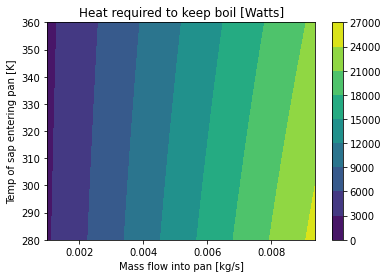

In [26]:
fig = plt.figure()
cs= plt.contourf(mdots,Tsapis, result2_)
plt.xlabel('Mass flow into pan [kg/s]')
plt.ylabel('Temp of sap entering pan [K]')
plt.title('Heat required to keep boil [Watts]')
fig.colorbar(cs)
plt.show()

In [45]:
# globals().clear